Image size: 403 rows x 302 columens


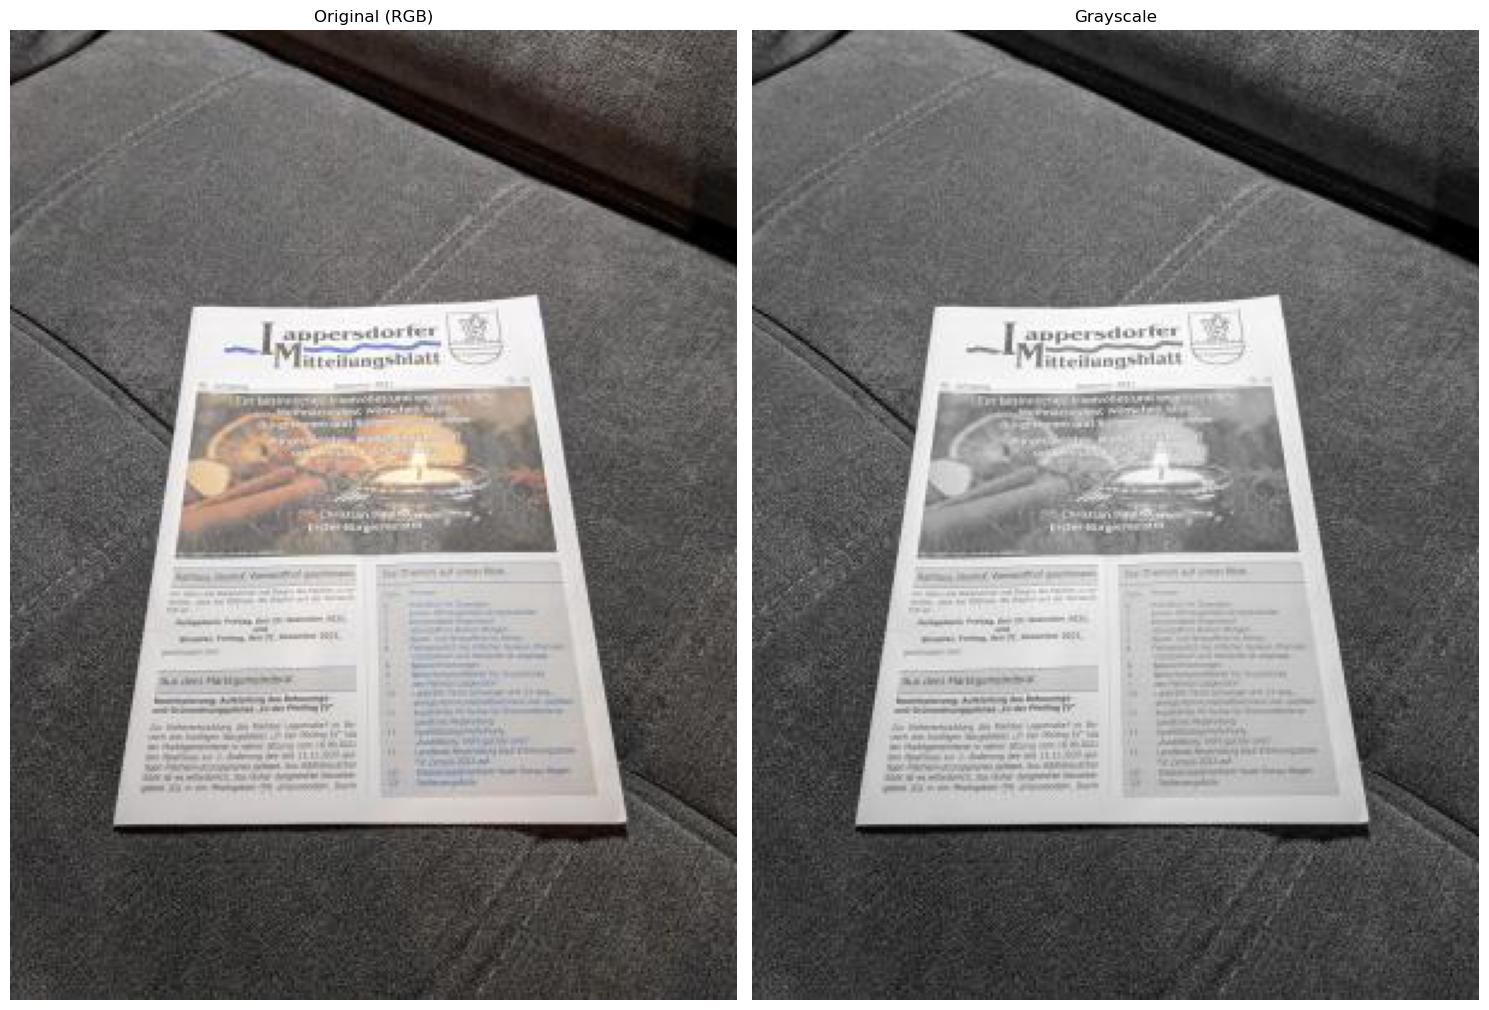

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

img = cv2.imread('data/document.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape

print(f"Image size: {rows} rows x {cols} columens")

# Show results
plt.subplot(121), plt.imshow(img_rgb)
plt.title('Original (RGB)')
plt.axis('off')

plt.subplot(122), plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.tight_layout()
plt.show()

Coordinates from doc:
Top left:    [76, 115]
Top right:   [219, 111]
Bottom left:     [43, 330]
Bottom right:    [256, 329]


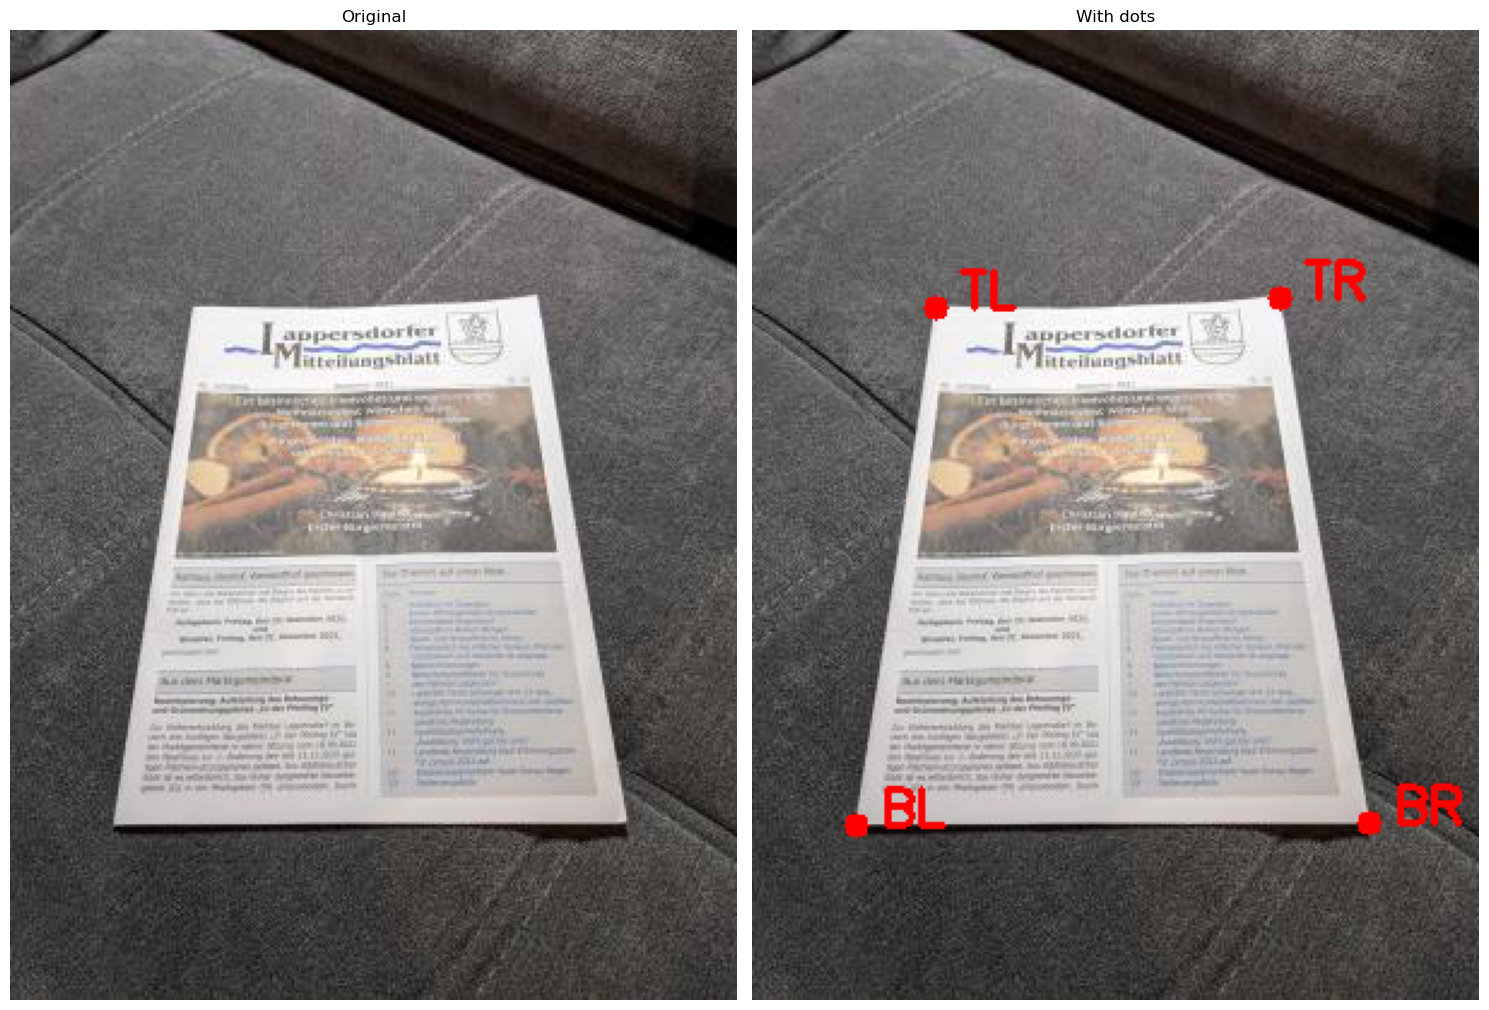

In [2]:
# Cooridantes from HM6
top_left = [76, 115]
top_right = [219, 111]
bottom_left = [43, 330]
bottom_right = [256, 329]

print("Coordinates from doc:")
print(f"Top left:    {top_left}")
print(f"Top right:   {top_right}")
print(f"Bottom left:     {bottom_left}")
print(f"Bottom right:    {bottom_right}")

# Show dots
out = np.copy(img_rgb)


cv2.circle(out, tuple(top_left), 5, (255, 0, 0), -1)
cv2.circle(out, tuple(top_right), 5, (255, 0, 0), -1)
cv2.circle(out, tuple(bottom_left), 5, (255, 0, 0), -1)
cv2.circle(out, tuple(bottom_right), 5, (255, 0, 0), -1)


cv2.putText(out, 'TL', (top_left[0]+10, top_left[1]), 
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
cv2.putText(out, 'TR', (top_right[0]+10, top_right[1]), 
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
cv2.putText(out, 'BL', (bottom_left[0]+10, bottom_left[1]), 
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
cv2.putText(out, 'BR', (bottom_right[0]+10, bottom_right[1]), 
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# Show results
plt.subplot(121), plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(122), plt.imshow(out)
plt.title('With dots')
plt.axis('off')

plt.tight_layout()
plt.show()

In [3]:
# Source points - where document corners are NOW (current position)
# These are the 4 corners we detected in Homework 6

src = np.array([
    top_left,
    top_right,
    bottom_left,
    bottom_right
], dtype=np.float32)

# Destination points - where we WANT corners to be (target position)

dst = np.array([
    [0, 0],              # where top_left should go
    [cols-1, 0],         # where top_right should go
    [0, rows-1],         # where bottom_left should go
    [cols-1, rows-1]     # where bottom_right should go
], dtype=np.float32)

print("Source points (where corners are NOW):")
print(src)
print(f"\nDestination points:")
print(dst)
print(f"\nImage size: {cols} x {rows} pixels")

Source points (where corners are NOW):
[[ 76. 115.]
 [219. 111.]
 [ 43. 330.]
 [256. 329.]]

Destination points:
[[  0.   0.]
 [301.   0.]
 [  0. 402.]
 [301. 402.]]

Image size: 302 x 403 pixels


Trying Affine Transform with FIRST 3 points

Affine matrix (first 3 points):
[[ 2.11397119e+00  3.24469996e-01 -1.97975860e+02]
 [ 5.25267043e-02  1.87782968e+00 -2.19942443e+02]]

This is a 2x3 matrix: [rotation/scale/shear | translation]


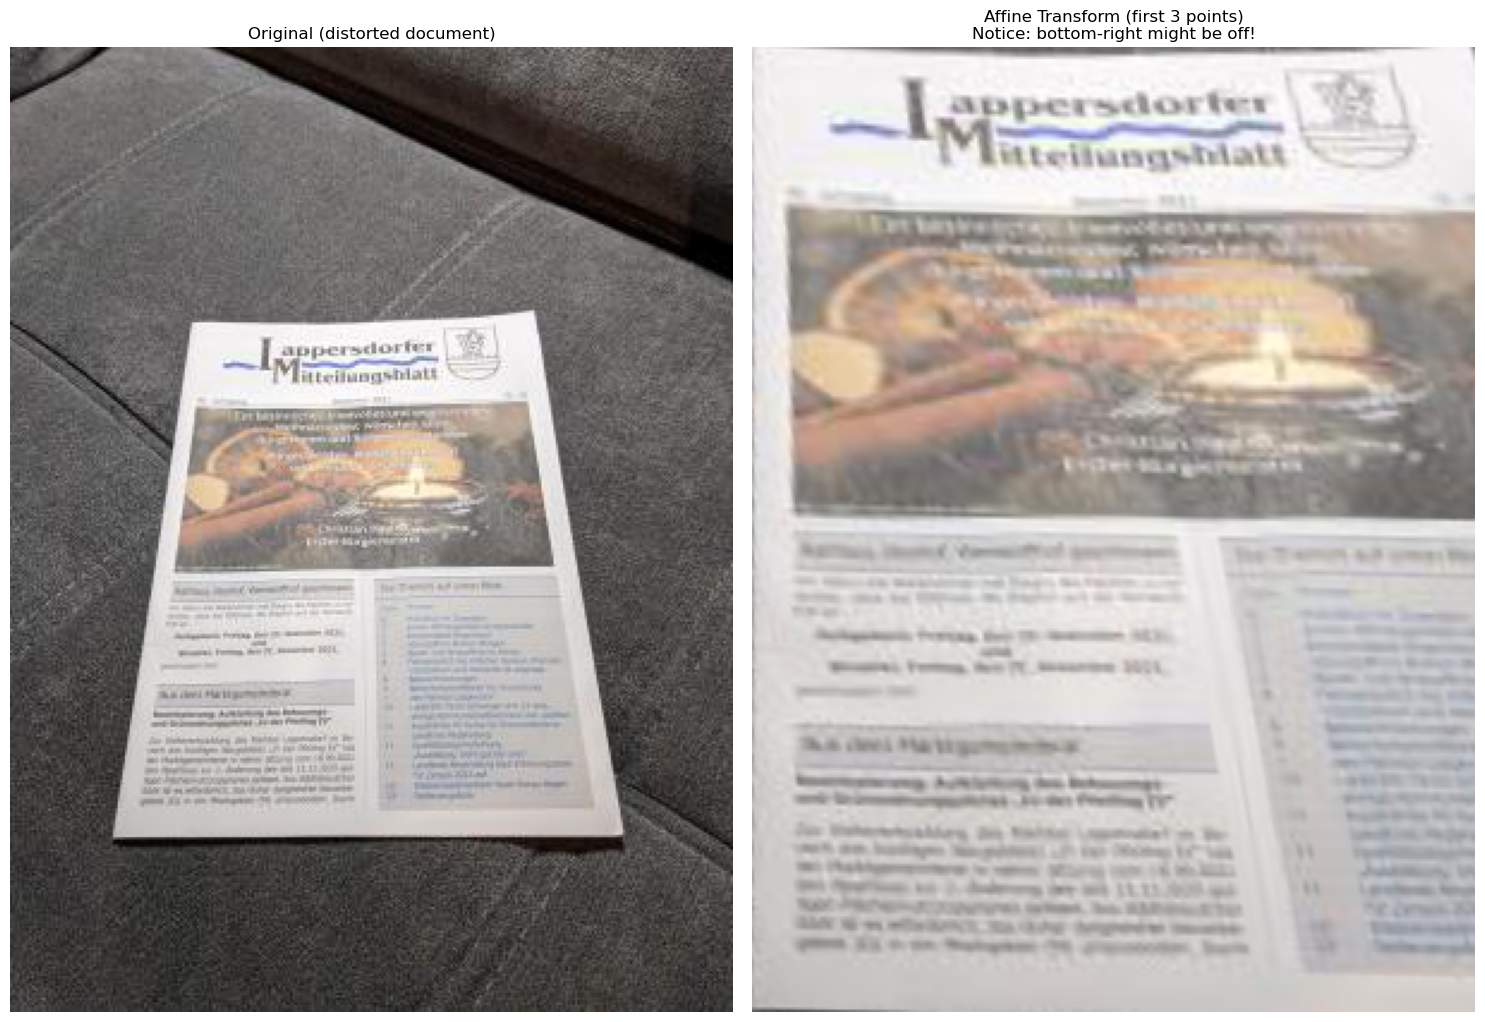

We only used 3 points, so the 4th might not align perfectly!


In [13]:
# METHOD 1: AFFINE TRANSFORM (using first 3 points) 

# Affine transform needs exactly 3 point pairs
# Let's use first 3: top_left, top_right, bottom_left


print("Trying Affine Transform with FIRST 3 points\n")

# Calculate affine transformation matrix
# Takes first 3 points from src → first 3 points from dst
M_affine_first = cv2.getAffineTransform(src[:3], dst[:3])

print("Affine matrix (first 3 points):")
print(M_affine_first)
print("\nThis is a 2x3 matrix: [rotation/scale/shear | translation]")

# Apply the transformation to warp the image
rectified_first = cv2.warpAffine(img_rgb, M_affine_first, (cols, rows))

# Show results
plt.subplot(121)
plt.imshow(img_rgb)
plt.title('Original (distorted document)')
plt.axis('off')

plt.subplot(122)
plt.imshow(rectified_first)
plt.title('Affine Transform (first 3 points)\nNotice: bottom-right might be off!')
plt.axis('off')

plt.tight_layout()
plt.show()

print("We only used 3 points, so the 4th might not align perfectly!")

Trying Affine Transform with last 3 points

Affine matrix (last 3 points):
[[ 1.41202040e+00 -2.39654839e-01  1.83692195e+01]
 [ 8.65055626e-03  1.84256848e+00 -2.06419573e+02]]


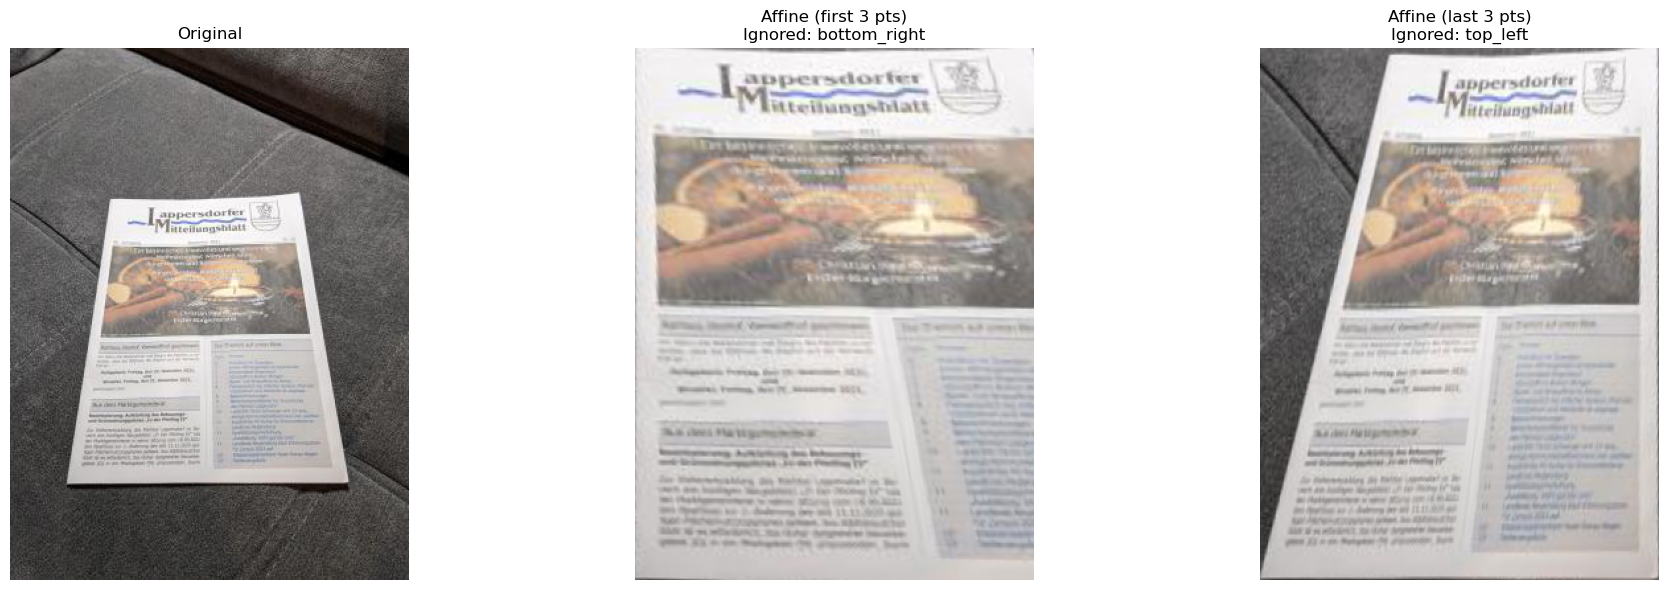

Both look wrong in different ways
Affine transform just can't handle all 4 corners with perspective distortion


In [8]:
# METHOD 2: AFFINE TRANSFORM (using last 3 points)

# Now let's try the last 3 points instead
# This time we use: top_right, bottom_left, bottom_right
# And we will ignore top_left!

print("Trying Affine Transform with last 3 points\n")

# Use last 3 points (indices 1, 2, 3)
M_affine_last = cv2.getAffineTransform(src[1:], dst[1:])

print("Affine matrix (last 3 points):")
print(M_affine_last)

# Apply transformation
rectified_last = cv2.warpAffine(img_rgb, M_affine_last, (cols, rows))

# Compare both affine results
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].imshow(img_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(rectified_first)
axes[1].set_title('Affine (first 3 pts)\nIgnored: bottom_right')
axes[1].axis('off')

axes[2].imshow(rectified_last)
axes[2].set_title('Affine (last 3 pts)\nIgnored: top_left')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Both look wrong in different ways")
print("Affine transform just can't handle all 4 corners with perspective distortion")

Trying Affine Transform with all 4 points (estimated)

Estimated affine matrix:
[[ 2.09494924e+00 -3.55564779e-01 -1.18326192e+02]
 [ 5.13377179e-02  1.83532341e+00 -2.14963859e+02]]

Inliers vector:
[1 1 0 1]

What does this mean?
1 = this point fits the affine model well (inlier)
0 = this point doesn't fit the model (outlier)
Number of inliers: 3/4


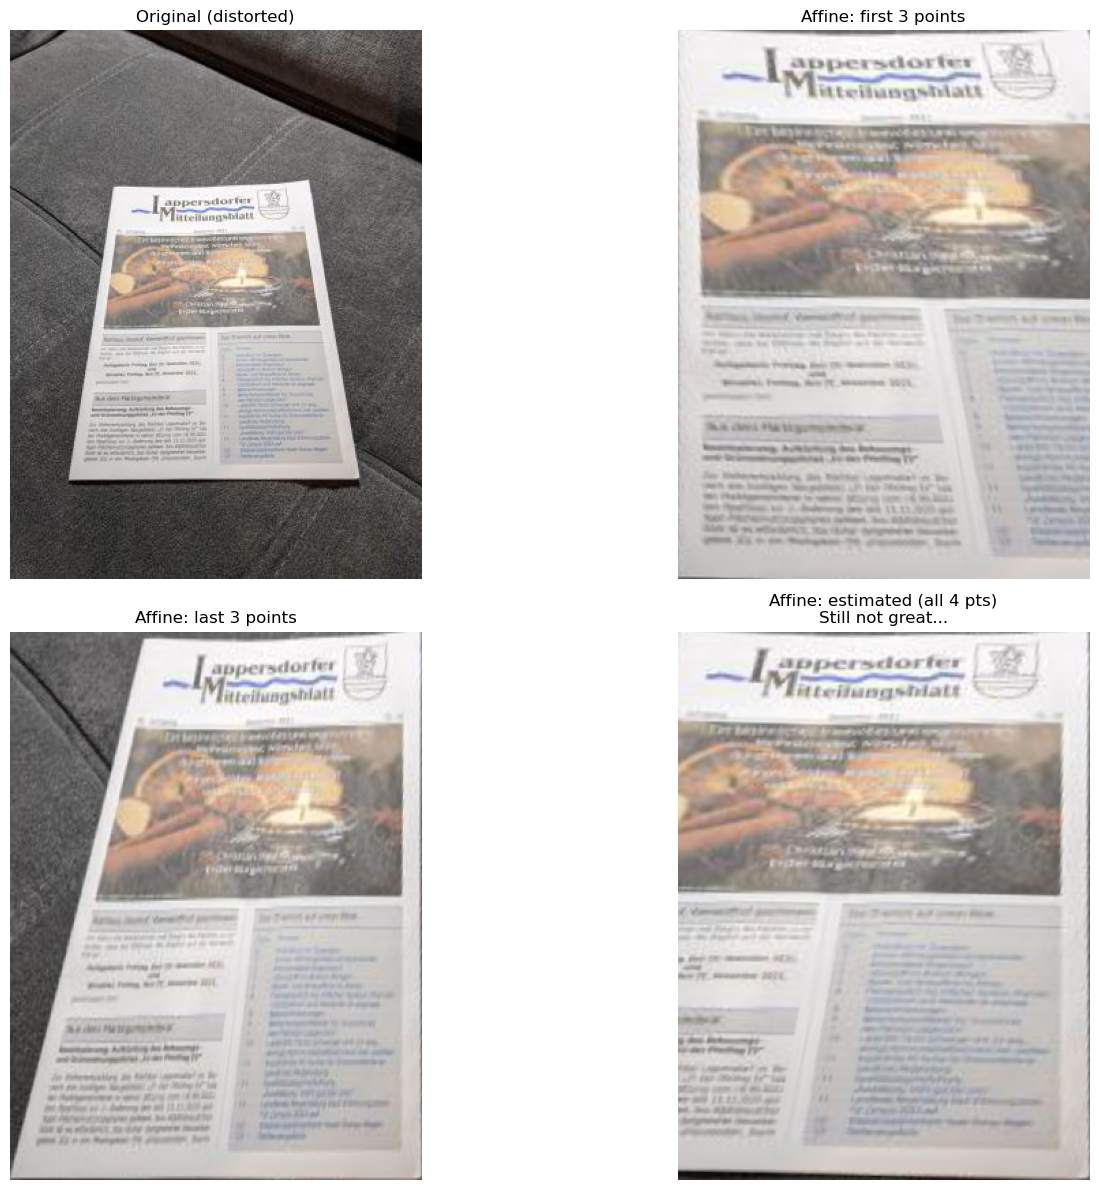

Affine transform cannot model perspective distortion!


In [9]:
# METHOD 3: AFFINE TRANSFORM (all 4 points with estimation)


# Use estimations OpenCV will try to find the best affine that fits all 4 (might not be perfect)

print("Trying Affine Transform with all 4 points (estimated)\n")

# estimateAffine2D uses optimization + RANSAC to find best-fit affine
# It returns: transformation matrix + inliers vector
M_affine_estimated, inliers = cv2.estimateAffine2D(src, dst)

print("Estimated affine matrix:")
print(M_affine_estimated)

print("\nInliers vector:")
print(inliers.ravel())
print("\nWhat does this mean?")
print("1 = this point fits the affine model well (inlier)")
print("0 = this point doesn't fit the model (outlier)")
print(f"Number of inliers: {np.sum(inliers)}/4")

# Apply transformation
rectified_estimated = cv2.warpAffine(img_rgb, M_affine_estimated, (cols, rows))

# Compare all three affine approaches
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title('Original (distorted)')
axes[0, 0].axis('off')

axes[0, 1].imshow(rectified_first)
axes[0, 1].set_title('Affine: first 3 points')
axes[0, 1].axis('off')

axes[1, 0].imshow(rectified_last)
axes[1, 0].set_title('Affine: last 3 points')
axes[1, 0].axis('off')

axes[1, 1].imshow(rectified_estimated)
axes[1, 1].set_title('Affine: estimated (all 4 pts)\nStill not great...')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Affine transform cannot model perspective distortion!")


Using Homography (Perspective Transform)

Homography matrix (3x3):
[[ 2.96021029e+00  4.54357858e-01 -2.77227135e+02]
 [ 1.07463050e-01  3.84180405e+00 -4.49974657e+02]
 [ 2.37188082e-04  3.13841065e-03  1.00000000e+00]]

Notice: 3x3 matrix (not 2x3 like affine)
Has 8 degrees of freedom vs affine's 6
That extra flexibility = can handle perspective!


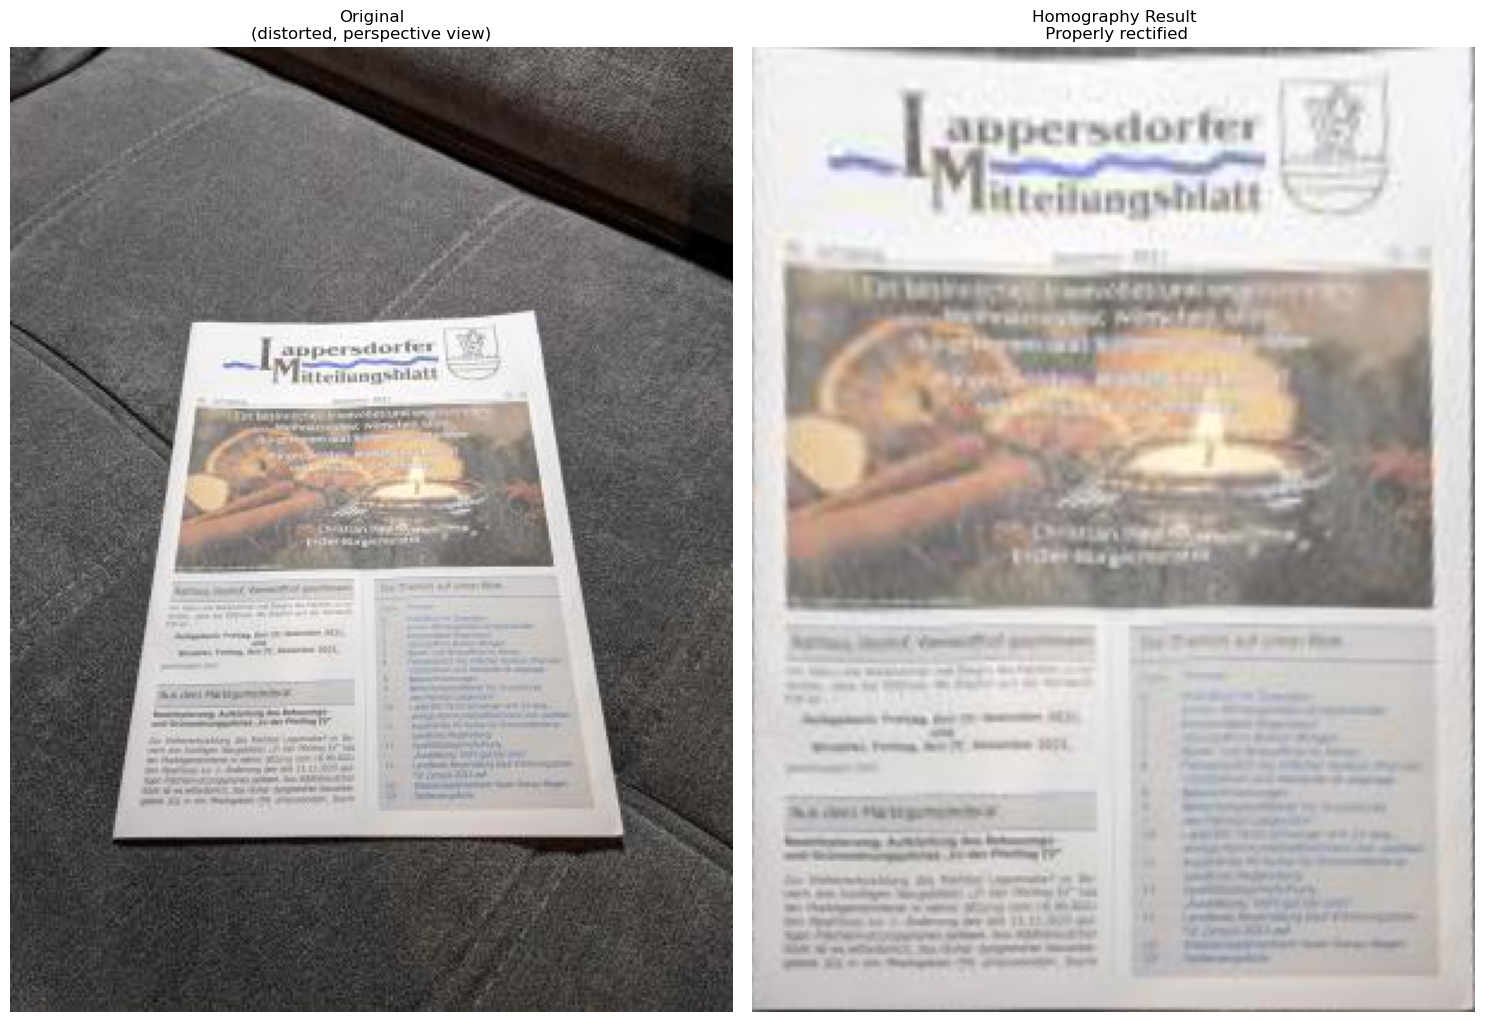


 God bless python it works


In [11]:
# METHOD 4: HOMOGRAPHY (Perspective Transform) 

# Affine failed because it can't handle perspective distortion!
# Solution: Homography (perspective transform)
# Uses all 4 points and cna model perspective

print("Using Homography (Perspective Transform)\n")

# Calculate homography matrix using all 4 point pairs
# This solves the perspective projection equation analytically
M_homography = cv2.getPerspectiveTransform(src, dst)

print("Homography matrix (3x3):")
print(M_homography)
print("\nNotice: 3x3 matrix (not 2x3 like affine)")
print("Has 8 degrees of freedom vs affine's 6")
print("That extra flexibility = can handle perspective!")

# Apply perspective transformation
# Note: warpPerspective 
rectified_homography = cv2.warpPerspective(img_rgb, M_homography, (cols, rows))

# Show results
plt.subplot(121)
plt.imshow(img_rgb)
plt.title('Original\n(distorted, perspective view)')
plt.axis('off')

plt.subplot(122)
plt.imshow(rectified_homography)
plt.title('Homography Result\n Properly rectified')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n God bless python it works")


Comparing all methods:



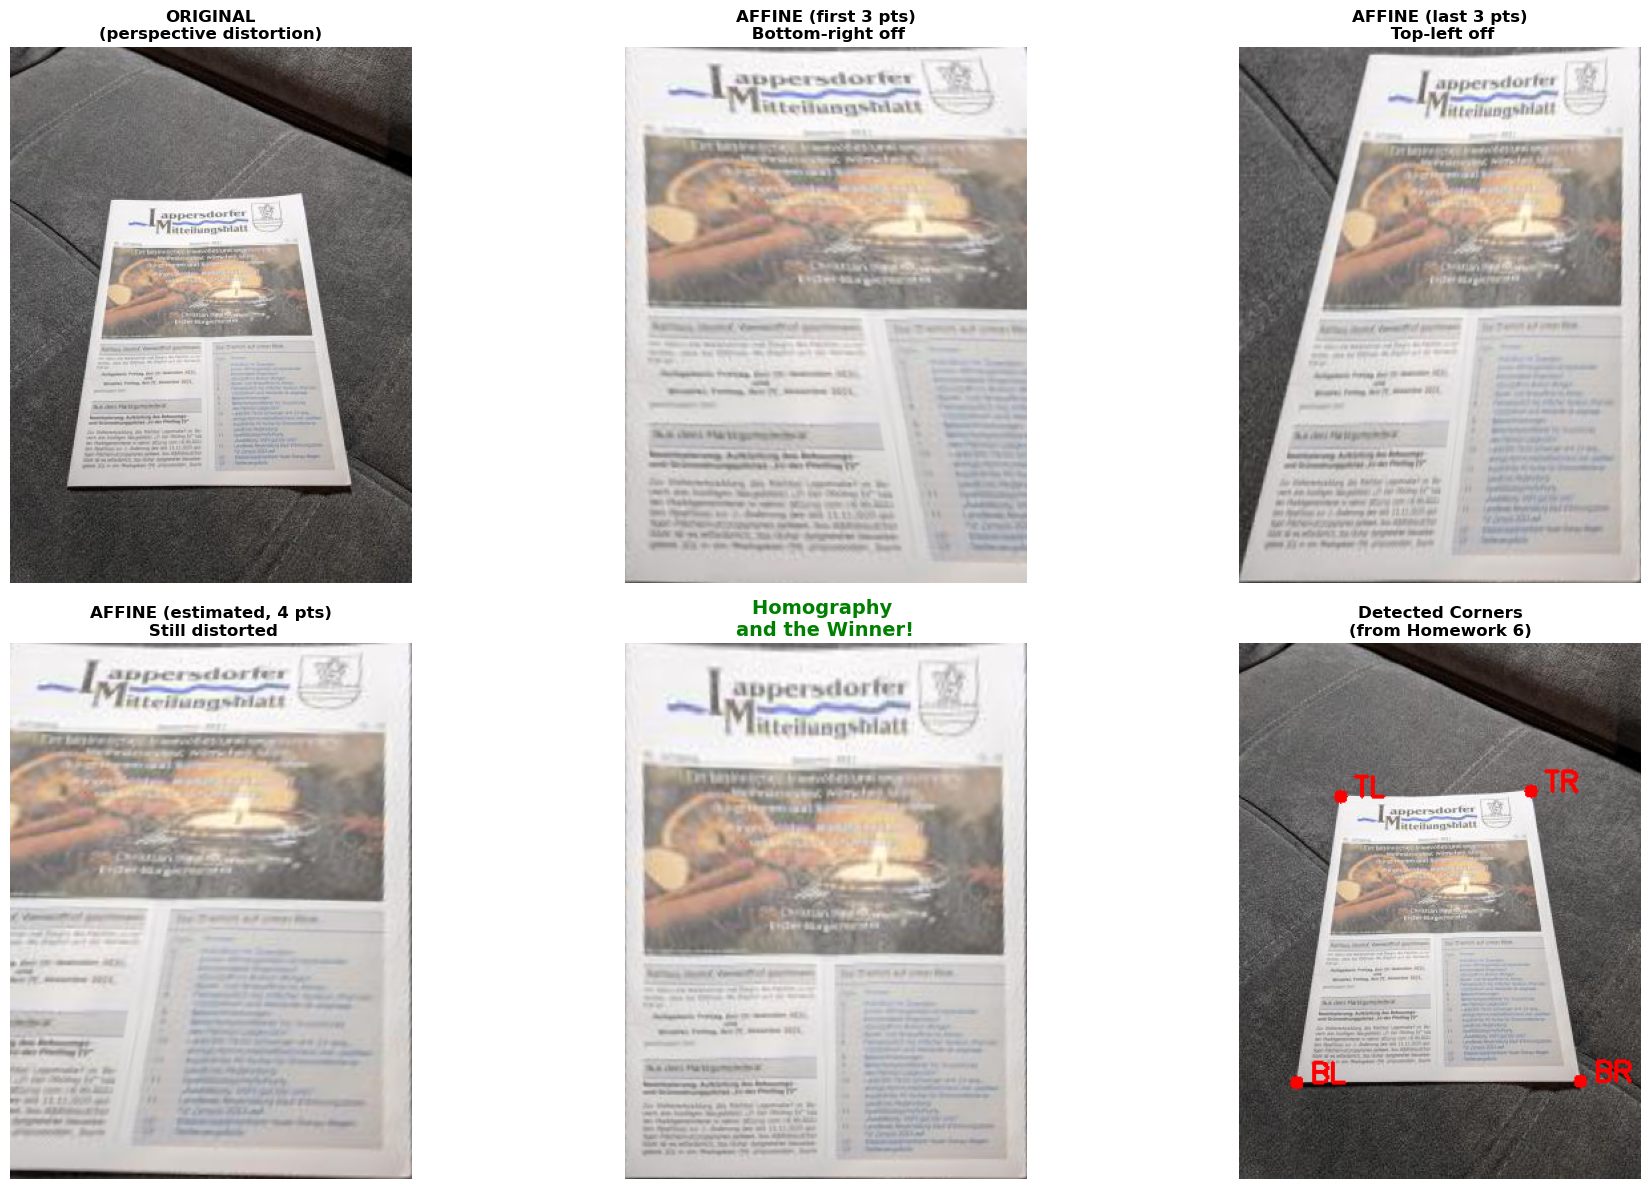

In [12]:
# ALL METHODS COMPARED 

print("Comparing all methods:\n")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Original
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title('ORIGINAL\n(perspective distortion)', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Affine: first 3 points
axes[0, 1].imshow(rectified_first)
axes[0, 1].set_title('AFFINE (first 3 pts)\n Bottom-right off', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

# Affine: last 3 points
axes[0, 2].imshow(rectified_last)
axes[0, 2].set_title('AFFINE (last 3 pts)\n Top-left off', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

# Affine: estimated
axes[1, 0].imshow(rectified_estimated)
axes[1, 0].set_title('AFFINE (estimated, 4 pts)\n Still distorted', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

# Homography - THE WINNER!
axes[1, 1].imshow(rectified_homography)
axes[1, 1].set_title('Homography \nand the Winner!', fontsize=14, fontweight='bold', color='green')
axes[1, 1].axis('off')

# Detected corners (reference)
axes[1, 2].imshow(out)
axes[1, 2].set_title('Detected Corners\n(from Homework 6)', fontsize=12, fontweight='bold')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()
